#Thu vien

In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

In [7]:
#Doc du lieu

In [8]:
path = "/kaggle/input/data-test/Gia SMP va SMPcap 2021(Gi th trng SMP).csv"
data = pd.read_csv(path, encoding="latin-1",sep=";")
data

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [9]:
msv = 2151264646
col1 = msv%16 + 1
col2 = msv%16 + 2
col3 = msv%16 + 3
dulieu = data[[str(col1),str(col2),str(col3)]]
dulieu.head(5)

,7,8,9
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.1
4,1061.5,1061.5,1061.5


In [10]:
dulieu['date'] = data['Ngày']
dulieu['date'] = pd.to_datetime(dulieu['date'], format='%d/%m/%Y')

/tmp/ipykernel_33/3289481305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dulieu['date'] = data['Ngày']
/tmp/ipykernel_33/3289481305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dulieu['date'] = pd.to_datetime(dulieu['date'], format='%d/%m/%Y')


In [11]:
dulieu

,7,8,9,date
0,964.4,964.4,964.4,2021-01-01
1,1019.7,1019.7,1019.7,2021-02-01
2,988.4,988.4,988.4,2021-03-01
3,1002.0,1002.0,1002.1,2021-04-01
4,1061.5,1061.5,1061.5,2021-05-01
...,...,...,...,...
360,1002.0,1002.0,1002.0,2021-12-27
361,1002.0,1002.0,1002.0,2021-12-28
362,1061.5,1061.5,1061.5,2021-12-29
363,1022.6,1022.6,1022.6,2021-12-30


In [12]:
#EDA

##Mo ta du lieu

In [13]:
# Xem thông tin tổng quan về dữ liệu
print("Thông tin tổng quan về dữ liệu:")
dulieu.info()

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   7       365 non-null    float64       
 1   8       365 non-null    float64       
 2   9       365 non-null    float64       
 3   date    365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [14]:
# Thống kê mô tả của dữ liệu
print("\nThống kê mô tả của dữ liệu:")
dulieu.describe()


Thống kê mô tả của dữ liệu:


,7,8,9,date
count,365.000000,365.000000,365.000000,365
mean,1040.228493,1040.228219,1040.278082,2021-07-02 00:00:00
min,885.700000,885.700000,885.700000,2021-01-01 00:00:00
25%,988.400000,988.400000,988.400000,2021-04-02 00:00:00
50%,1022.600000,1022.600000,1022.600000,2021-07-02 00:00:00
75%,1061.500000,1061.500000,1061.500000,2021-10-01 00:00:00
max,1565.500000,1565.500000,1565.500000,2021-12-31 00:00:00
std,105.146912,105.147104,105.152979,NaN


In [15]:
# Kiểm tra giá trị thiếu trong dữ liệu
print("\nKiểm tra giá trị thiếu trong dữ liệu:")
dulieu.isnull().sum()


Kiểm tra giá trị thiếu trong dữ liệu:


7       0
8       0
9       0
date    0
dtype: int64

##Truc quan hoa du lieu

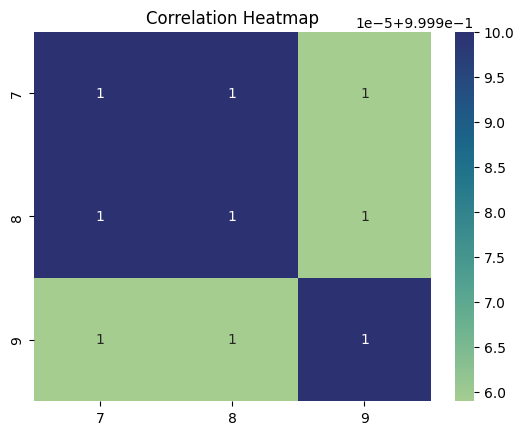

In [16]:
dulieu_corr = data[[str(col1),str(col2),str(col3)]].corr()
sns.heatmap(dulieu_corr, annot=True, cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


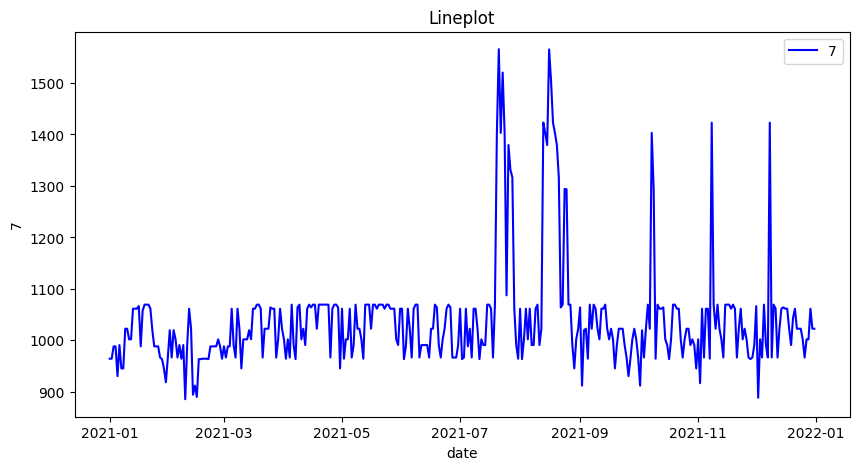

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=dulieu, x="date", y=str(col1), label=col1, color ='blue')
plt.title('Lineplot')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


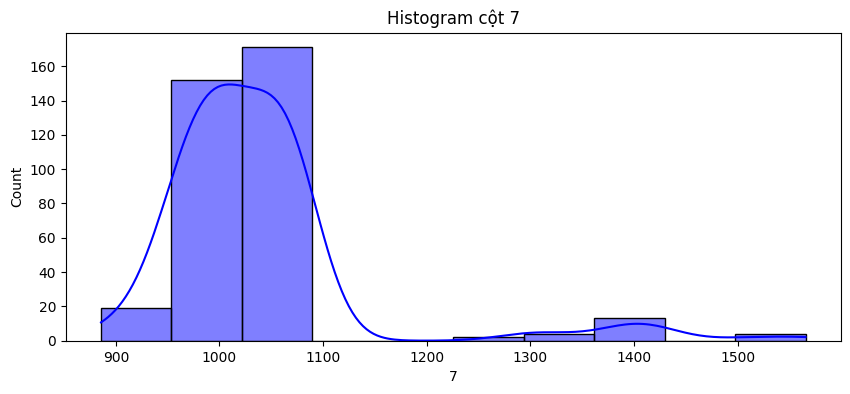

In [18]:
fig, axes = plt.subplots(figsize=(10, 4))
sns.histplot(data=dulieu, x=str(col1), bins= 10, kde=True, color ='b', ax = axes)
axes.set_title(f'Histogram cột {col1}')
plt.show()

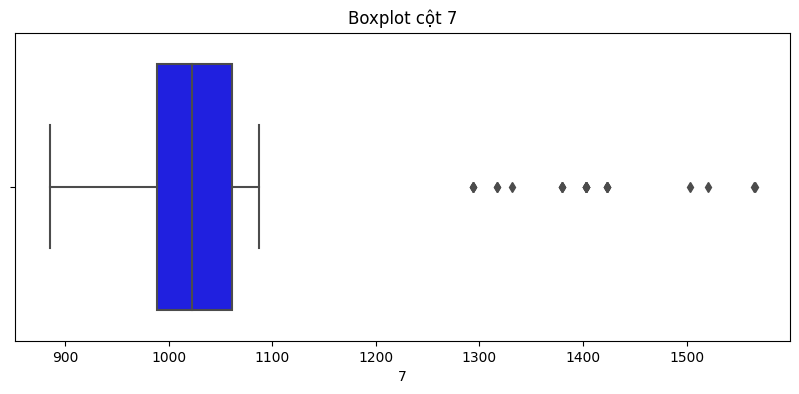

In [19]:
fig, axes = plt.subplots(figsize=(10, 4))
# Biểu đồ 1
sns.boxplot(data=dulieu, x=str(col1), color ='b', ax=axes)
axes.set_title(f'Boxplot cột {col1}')
plt.show()

#Kalman


In [20]:
!pip install pykalman

In [21]:
from pykalman import KalmanFilter

# Khởi tạo bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)


In [22]:
# Áp dụng bộ lọc Kalman cho từng cột dữ liệu
dulieu[f'{col1}_kalman'] = kf.smooth(dulieu[str(col1)].values)[0]
dulieu[f'{col2}_kalman'] = kf.smooth(dulieu[str(col2)].values)[0]
dulieu[f'{col3}_kalman'] = kf.smooth(dulieu[str(col3)].values)[0]


/tmp/ipykernel_33/3230251908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dulieu[f'{col1}_kalman'] = kf.smooth(dulieu[str(col1)].values)[0]
/tmp/ipykernel_33/3230251908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dulieu[f'{col2}_kalman'] = kf.smooth(dulieu[str(col2)].values)[0]
/tmp/ipykernel_33/3230251908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

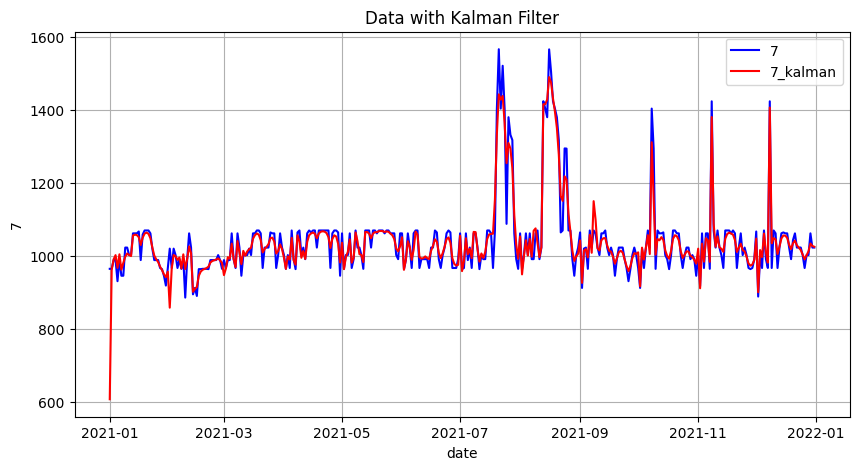

In [23]:

import numpy as np


# Trực quan hóa kết quả sau khi áp dụng bộ lọc Kalman
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=dulieu, x="date", y=str(col1), label=col1, color ='b')
sns.lineplot(ax=ax, data=dulieu, x="date", y=f'{col1}_kalman', label=f'{col1}_kalman', color ='r')
plt.title('Data with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()

#Dự đoán

In [24]:
!pip install statsmodels

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

ADF Statistic: -2.612356927146208
p-value: 0.09047014162521883


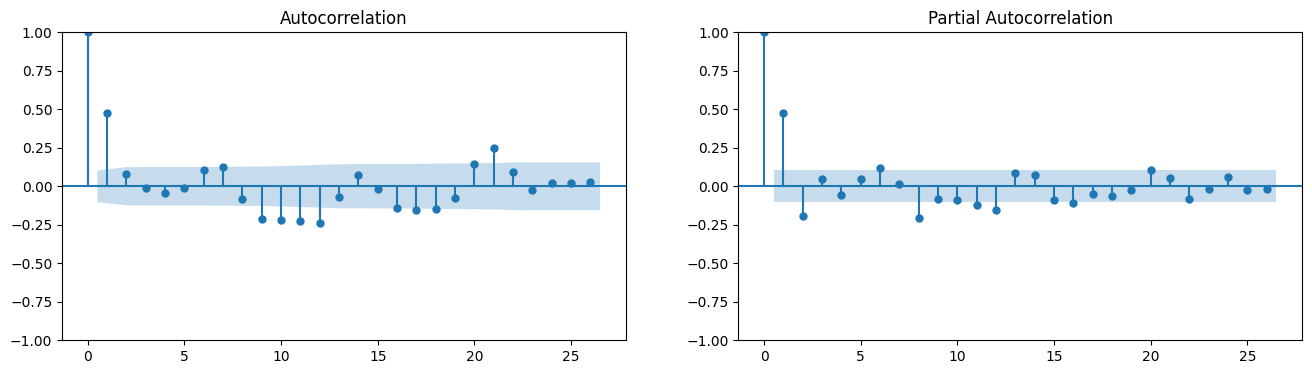

In [26]:
# Chọn một cột dữ liệu để dự đoán (ví dụ col1)
series = dulieu[f'{col1}_kalman']

# Kiểm tra tính dừng của dữ liệu bằng ADF test
result = adfuller(series.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# Nếu dữ liệu không dừng (p-value > 0.05), thực hiện vi phân
if result[1] > 0.05:
    series = series.diff().dropna()

# Xác định tham số p và q bằng ACF và PACF plots (có thể sử dụng visual inspection hoặc grid search)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(series, ax=axes[0])
plot_pacf(series, ax=axes[1])
plt.show()

In [27]:
# Khởi tạo và đào tạo mô hình ARIMA
model = ARIMA(series, order=(5, 1, 7))  # Thay đổi order nếu cần thiết
model_fit = model.fit()

# Tóm tắt mô hình
print(model_fit.summary())

# Dự báo
forecast_steps = 7  # Số bước dự báo
forecast = model_fit.forecast(steps=forecast_steps)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               7_kalman   No. Observations:                  364
Model:                 ARIMA(5, 1, 7)   Log Likelihood               -1668.082
Date:                Tue, 21 May 2024   AIC                           3362.164
Time:                        02:33:08   BIC                           3412.791
Sample:                             0   HQIC                          3382.288
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.130     -0.177      0.859      -0.278       0.232
ar.L2         -0.7084      0.114     -6.233      0.000      -0.931      -0.486
ar.L3         -0.4924      0.180     -2.742      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


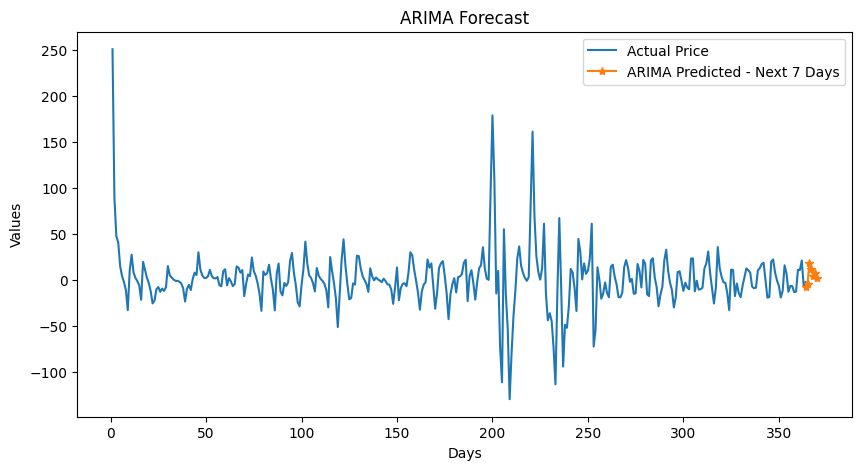

In [28]:
predicted_dates = np.arange(len(series), len(series) + len(forecast))

plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual Price')
plt.plot(np.arange(len(series), len(series) + len(forecast)), forecast, label='ARIMA Predicted - Next 7 Days', marker='*')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()